C:\Users\tsuchida\Anaconda3\lib\site-packages\smart_open\smart_open_lib.py:402: UserWarning: This function is deprecated, use smart_open.open instead. See the migration notes for details: https://github.com/RaRe-Technologies/smart_open/blob/master/README.rst#migrating-to-the-new-open-function
  'See the migration notes for details: %s' % _MIGRATION_NOTES_URL


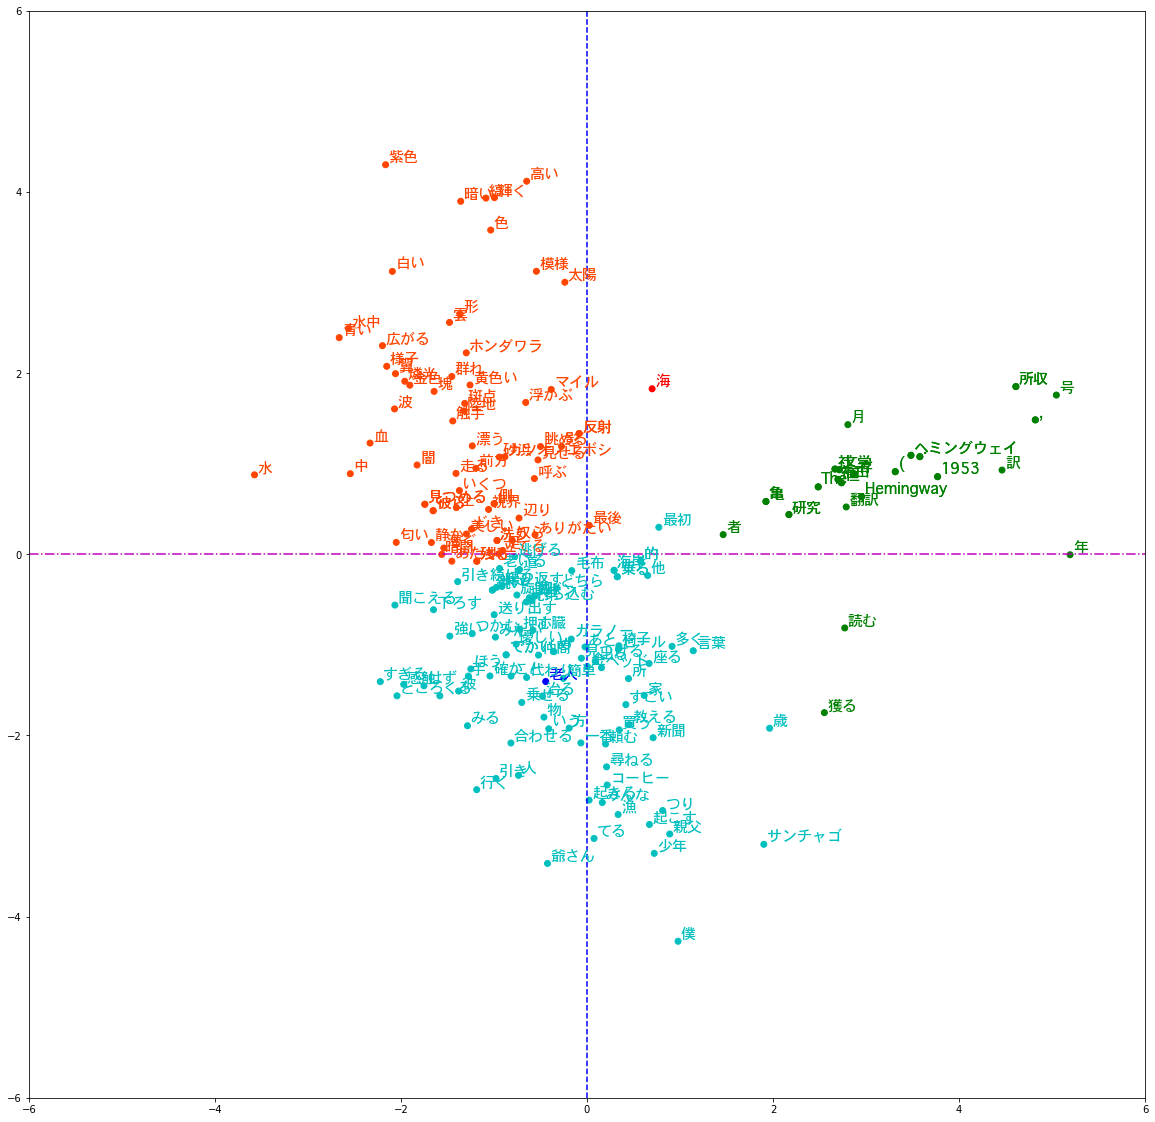

In [2]:
#AI-TECHGYM-1-12-Q-1
#自然言語処理

#実行場所
import os
os.chdir(r"C:\Users\tsuchida\Documents\techgym_セミナー\TortoiseGit_resorce\techgym_ai\Chapter_1\Answer_sheet\AI_Chapter1_saved_files")

#インポート
from gensim.models import word2vec
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.font_manager as font_manager

#PCA
from sklearn.decomposition import PCA

# k-means法を使うためのインポート
from sklearn.cluster import KMeans
import pandas as pd

#フォントの指定
FONTPATH='./Osaka.ttc'
prop = font_manager.FontProperties(fname=FONTPATH)

#モデルの読み込み
model_path = './words.model'
model = word2vec.Word2Vec.load(model_path)

#単語ベクトルの可視化
def draw_2d_2groups(vectors, target1, target2, topn=100):
    similars1 = [w[0] for w in vectors.wv.most_similar(target1, topn=topn)]
    similars1.insert(0, target1)
    similars2 = [w[0] for w in vectors.wv.most_similar(target2, topn=topn)]
    similars2.insert(0, target2)
    similars = similars1 + similars2
    # colors = ['b']+['g']*(topn)+ ['r']+['orangered']*(topn)
    X = [vectors.wv[w] for w in similars]
    pca = PCA(n_components=2)
    Y = pca.fit_transform(X)
    df_Y = pd.DataFrame(Y, columns=['x', 'y'])
    # display(df_Y)

    # KMeansクラスの初期化
    kmeans = KMeans(init='random', n_clusters=3, random_state=0)
    # クラスターの重心を計算
    kmeans.fit(df_Y)
    # クラスター番号をpandasのSeriesオブジェクトに変換
    labels = pd.Series(kmeans.labels_, name='cluster_number')
    # クラスター番号をdf_Yに追加する
    df_Y = pd.concat([df_Y, labels], axis=1)
    # display(df_Y)
    colors = []
    for number in df_Y['cluster_number']:
        if number == 0:
            colors.append('g')
        elif number == 1:
            colors.append('orangered')
        else:
            colors.append('c')
    colors[0] = 'b'
    colors[101] = 'r'
    # print(similars)

    # グラフの縦軸・横軸の目盛間隔を揃える
    plt.figure(figsize = (20, 20))
    plt.gca().set_xlim(-6, 6)
    plt.gca().set_ylim(-6, 6)
    plt.scatter(df_Y.iloc[:,0], df_Y.iloc[:,1], color=colors)

    # y=0に水平線を引く
    plt.axhline(0, ls = "-.", color = "m")
    # x=0に垂直線を引く
    plt.axvline(0, ls = "--", color = "b")

    for w, x, y, c in zip(similars[:], Y[:,0], Y[:,1], colors[:]):
        plt.annotate(w, xy=(x, y), xytext=(3,3), textcoords='offset points', fontproperties=prop, fontsize=15, color=c)
    plt.show()

draw_2d_2groups(model, '老人', '海')

In [23]:
for vector in w_vecs_pca:
    print(vector)

[-3.81495282 -3.54411881]
[4.32545085 6.87544875]
[15.24941044 -2.95832952]
[-8.07020647  2.66893763]
[-7.68970199 -3.04193805]


In [95]:
token = t.tokenize(lines[0][0])
print(token)
for a in token:
    print(a)

# print(type(text_c[0]))
# print(text_c[0])

# text_str = str(text_c[0])
# print(type(text_str))
# print(text_str)
# print(len(text_str))

老	名詞,一般,*,*,*,*,老,ロウ,ロー


In [44]:
#AI-TECHGYM-1-11-Q-1
#自然言語処理

#実行場所
import os
os.chdir(r"C:\Users\tsuchida\Documents\techgym_セミナー\TortoiseGit_resorce\techgym_ai\Chapter_1\Answer_sheet\AI_Chapter1_saved_files")

#インポート
import urllib.request
import zipfile

# ファイル整形
import re

#ファイルダウンロード
url = 'https://www.aozora.gr.jp/cards/001847/files/57347_ruby_57225.zip'
zip = '57347_ruby_57225.zip'
urllib.request.urlretrieve(url, zip)

# ダウンロードしたzipの解凍
with zipfile.ZipFile(zip, 'r') as myzip:
  myzip.extractall()
  # 解凍後のファイルからデータ読み込み
  for myfile in myzip.infolist():
    # 解凍後ファイル名取得
    filename = myfile.filename
    # ファイルオープン時にencodingを指定してsjisの変換をする
    with open(filename, encoding='sjis') as file:
      text = file.read()


re.findall('\n\n', text)

['\n\n',
 '\n\n',
 '\n\n',
 '\n\n',
 '\n\n',
 '\n\n',
 '\n\n',
 '\n\n',
 '\n\n',
 '\n\n',
 '\n\n',
 '\n\n',
 '\n\n',
 '\n\n',
 '\n\n',
 '\n\n',
 '\n\n',
 '\n\n']

In [3]:
#1-10-(2)

import numpy as np
print('リスト linesの次元数、要素数 : 1, {}'.format(len(lines)))
print('リスト resultsの次元数、要素数 : 2, {}'.format(len(results)))

print('lines、resultsの外側の要素数は、元の文章の行数')

print('resultsの　行数 : 内側のリストの要素数')
for i, result in enumerate(results):
    print('{} : {}'.format(i+1, len(result)))

リスト linesの次元数、要素数 : 1, 18
リスト resultsの次元数、要素数 : 2, 18
lines、resultsの外側の要素数は、元の文章の行数
resultsの　行数 : 内側のリストの要素数
1 : 9
2 : 36
3 : 32
4 : 22
5 : 46
6 : 71
7 : 33
8 : 26
9 : 14
10 : 33
11 : 24
12 : 42
13 : 18
14 : 37
15 : 43
16 : 26
17 : 22
18 : 38


In [38]:
print(np.array(results))

[list(['月額', '2', '万', '円', 'の', '「', 'プログラミング', 'ライフ', '」'])
 list(['「', 'テック', 'ジム', '（', 'TechGYM', '）', '」', 'は', '、', 'どんな', 'テクノロジー', 'に', 'も', '即座', 'に', '対応', 'できる', '「', '自', '走', 'できる', 'エンジニア', '」', 'を', 'ゴール', 'に', 'し', 'た', '自習', '形式', 'の', 'プログラマー', '養成', '塾', 'です', '。'])
 list(['どんな', 'レベル', 'から', 'でも', '始め', 'られ', 'ます', 'ので', '、', '全く', 'の', 'プログラミング', '初心者', 'から', 'ベテラン', 'エンジニア', 'まで', '、', '各', '個人', 'の', 'スキル', 'レベル', 'に', 'あわせ', 'て', '学ぶ', 'こと', 'が', 'でき', 'ます', '。'])
 list(['なお', '、', '最速', 'で', 'プログラミング', 'スキル', 'の', '獲得', 'を', 'し', 'たい', '方', 'に', 'は', 'テック', 'ジム', 'の', 'カリキュラム', 'が', 'オススメ', 'です', '。'])
 list(['開催', '期間', 'に', 'あわせ', 'て', '、', '好き', 'な', '時間', 'に', '好き', 'な', 'だけ', '、', '何', '回', 'でも', '参加', 'する', 'こと', 'が', '可能', 'で', '、', '課題', 'を', '持ち帰る', 'こと', 'も', '可能', 'です', '。', '（', '提携', '校', 'により', '開催', '頻度', 'や', '開催', '時間', 'が', '違い', 'ます', '。', '）'])
 list(['自習', 'を', '見守る', 'トレーナー', 'は', '、', '経験', '豊富', 'な', '現役', 'プログラマー', 'です', '。', 'カリキュラム',

In [21]:
df_trans_sch = trans[trans.InvoiceNo.isin(trans_XY)]
df_trans_X = df_trans_sch[df_trans_sch.StockCode == '85123A']
df_trans_Y = df_trans_sch[df_trans_sch.StockCode == '47566']
df_trans_XY = pd.concat([df_trans_X, df_trans_Y], axis=0)
print(len(df_trans_XY))
df_trans_XY.sort_values('InvoiceDate')

568


,Unnamed: 0,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,cancel_flg
20242,20242,538032,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-09 12:59:00,2.95,14479.0,United Kingdom,5
20248,20248,538032,47566,PARTY BUNTING,5,2010-12-09 12:59:00,4.65,14479.0,United Kingdom,5
21474,21474,538086,85123A,WHITE HANGING HEART T-LIGHT HOLDER,14,2010-12-09 14:44:00,2.95,12872.0,United Kingdom,5
21488,21488,538086,47566,PARTY BUNTING,1,2010-12-09 14:44:00,4.65,12872.0,United Kingdom,5
21578,21578,538095,85123A,WHITE HANGING HEART T-LIGHT HOLDER,1,2010-12-09 14:55:00,2.95,17097.0,Spain,5
21577,21577,538095,47566,PARTY BUNTING,1,2010-12-09 14:55:00,4.65,17097.0,Spain,5
27309,27309,538529,85123A,WHITE HANGING HEART T-LIGHT HOLDER,12,2010-12-13 10:24:00,2.95,14290.0,United Kingdom,5
27321,27321,538529,47566,PARTY BUNTING,5,2010-12-13 10:24:00,4.65,14290.0,United Kingdom,5
29758,29758,538826,47566,PARTY BUNTING,1,2010-12-14 12:58:00,4.65,12370.0,Cyprus,5
29732,29732,538826,85123A,WHITE HANGING HEART T-LIGHT HOLDER,64,2010-12-14 12:58:00,2.55,12370.0,Cyprus,5
